## 데이터 불러오기
- df_population : https://jumin.mois.go.kr/
- df_FHP : https://www.data.go.kr/data/15119055/openapi.do#/API%20%EB%AA%A9%EB%A1%9D/getDissByGenderAgeStats

In [1]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [67]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [239]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

# client=pymongo.MongoClient("127.0.0.1",27017)
# db= client['healthcare_project']
# collection_FHP = db['FHP_DATA']
# data_FHP = collection_FHP.find()
# df_FHP = pd.DataFrame(data_FHP)
# df_FHP
df_FHP = pd.read_json('healthcare_sideproject.FHP_data.json')
df_FHP=df_FHP.loc[:,'age':]
df_population = pd.read_excel('201212_201712_연령별인구현황_연간.xlsx')
df_FHP

,age,ptntCnt,rvdInsupBrdnAmt,rvdRpeTamtAmt,sex,sickCd,sickNm,specCnt,vstDdcnt,year,medTp
0,0_9세,3932,95210,139397,남,M542,경추통,6018,6058,2012,1
1,10_19세,22484,680864,1002106,남,M542,경추통,45875,46463,2012,1
2,20_29세,40220,1403913,2102501,남,M542,경추통,81110,83549,2012,1
3,30_39세,72214,2684385,4006517,남,M542,경추통,156272,160531,2012,1
4,40_49세,83085,3410722,5067199,남,M542,경추통,207102,211998,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
787,40_49세,85337,8563789,13026069,여,S134,경추의 염좌 및 긴장,303918,308814,2022,2
788,50_59세,86670,9434212,14141021,여,S134,경추의 염좌 및 긴장,341530,349249,2022,2
789,60_69세,64272,7480050,10303264,여,S134,경추의 염좌 및 긴장,287336,294471,2022,2
790,70_79세,23707,2858527,3448756,여,S134,경추의 염좌 및 긴장,121200,122912,2022,2


In [240]:
df_population

,year,sex,age,count
0,2012,남,0_9세,2409323
1,2012,남,10_19세,3390332
2,2012,남,20_29세,3459480
3,2012,남,30_39세,4163684
4,2012,남,40_49세,4510316
...,...,...,...,...
193,2022,여,40_49세,3974119
194,2022,여,50_59세,4258743
195,2022,여,60_69세,3767920
196,2022,여,70_79세,2079162


In [241]:
df_FHP=df_FHP.loc[:,'age':]

## 데이터 살펴보기
- age : 연령군(10세 단위)
- ptnCnt : 환자수
- rvdInsupBrdnAmt : 심사결정요양급여비용총액(1000원 단위)
- rvdRpeTamtAmt : 심사결정보험자부담금(1000원 단위)
- sex : 성별
- sickCd : 상병코드
- sickNm : 상병명
- specCnt : 명세서 수 
- vstDdcnt : 내원일수(입/내원일수)
- year : 년도
- medTp : 양방, 한방 구분( 1 : 양방, 2 : 한방)


In [242]:
df_population.describe(include='all')

,year,sex,age,count
count,198.000000,198,198,1.980000e+02
unique,NaN,2,9,NaN
top,NaN,남,0_9세,NaN
freq,NaN,99,22,NaN
mean,2017.000000,NaN,NaN,2.851665e+06
std,3.170294,NaN,NaN,1.155439e+06
min,2012.000000,NaN,NaN,2.921130e+05
25%,2014.000000,NaN,NaN,2.046574e+06
50%,2017.000000,NaN,NaN,3.056270e+06
75%,2020.000000,NaN,NaN,3.870008e+06


In [243]:
df_FHP.describe(include='all')

,age,ptntCnt,rvdInsupBrdnAmt,rvdRpeTamtAmt,sex,sickCd,sickNm,specCnt,vstDdcnt,year,medTp
count,792,792.000000,7.920000e+02,7.920000e+02,792,792,792,792.000000,792.000000,792.000000,792.000000
unique,9,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN
top,0_9세,NaN,NaN,NaN,남,M542,경추통,NaN,NaN,NaN,NaN
freq,88,NaN,NaN,NaN,396,396,396,NaN,NaN,NaN,NaN
mean,NaN,51164.328283,3.648731e+06,5.171834e+06,NaN,NaN,NaN,161326.949495,164899.997475,2017.000000,1.500000
std,NaN,41232.923020,3.748987e+06,5.379916e+06,NaN,NaN,NaN,136407.901348,138928.995336,3.164276,0.500316
min,NaN,673.000000,2.762100e+04,3.872200e+04,NaN,NaN,NaN,1929.000000,1945.000000,2012.000000,1.000000
25%,NaN,12280.750000,9.147752e+05,1.236349e+06,NaN,NaN,NaN,46861.500000,47261.000000,2014.000000,1.000000
50%,NaN,46586.500000,2.781102e+06,3.944384e+06,NaN,NaN,NaN,138149.000000,141108.000000,2017.000000,1.500000
75%,NaN,79154.750000,5.164924e+06,7.307143e+06,NaN,NaN,NaN,238620.250000,241469.750000,2020.000000,2.000000


In [244]:
df_FHP['year'] = df_FHP['year'].astype(object)
df_population['year']= df_population['year'].astype(object)

## 데이터 전처리

### 데이터 변환
- df_FHP : year는 범주형이기 때문에 범주형 데이터로 변환
- df_population : year는 범주형이기 때문에 범주형 데이터로 변환

In [245]:
df_FHP['year'] = df_FHP['year'].astype(object)
df_population['year']= df_population['year'].astype(object)

### 결측치 확인

In [246]:
df_FHP.isnull().sum()

age                0
ptntCnt            0
rvdInsupBrdnAmt    0
rvdRpeTamtAmt      0
sex                0
sickCd             0
sickNm             0
specCnt            0
vstDdcnt           0
year               0
medTp              0
dtype: int64

In [247]:
df_FHP = df_FHP[['year','sex','age','ptntCnt']]
df_FHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     792 non-null    object
 1   sex      792 non-null    object
 2   age      792 non-null    object
 3   ptntCnt  792 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 24.9+ KB


### 성별 전체 인구 중 거북목 환자 비율 구하기

In [253]:
df_total_FHP = pd.pivot_table(data=df_FHP,index=['year','age'], values=['ptntCnt'],aggfunc='sum')
df_total_FHP=df_total_FHP.reset_index()
df_total_FHP

,year,age,ptntCnt
0,2012,0_9세,35756
1,2012,10_19세,166172
2,2012,20_29세,362130
3,2012,30_39세,596588
4,2012,40_49세,714643
...,...,...,...
94,2022,40_49세,836760
95,2022,50_59세,820355
96,2022,60_69세,643707
97,2022,70_79세,297678


In [259]:
df_total_population = pd.pivot_table(data=df_population,index=['year','age'], values=['count'],aggfunc='sum')
df_total_population=df_total_population.reset_index()
df_total_population

,year,age,count
0,2012,0_9세,4668711
1,2012,10_19세,6447279
2,2012,20_29세,6626948
3,2012,30_39세,8168943
4,2012,40_49세,8836158
...,...,...,...
94,2022,40_49세,8073117
95,2022,50_59세,8612064
96,2022,60_69세,7403539
97,2022,70_79세,3825717


In [265]:
df_total_FHP['entire_population']=df_total_population['count']

In [266]:
df_total_FHP['patient_ratio'] = (df_total_FHP['ptntCnt']/df_total_FHP['entire_population'])*100

In [267]:
df_total_FHP = pd.pivot_table(data=df_total_FHP,index=['year','age'], values=['ptntCnt'],aggfunc='sum')
df_total_FHP=df_total_FHP.reset_index()
df_total_FHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     99 non-null     int64 
 1   age      99 non-null     object
 2   ptntCnt  99 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [268]:
df_total_FHP['entire_population']=df_total_population['count']

In [269]:
df_total_FHP['patient_ratio'] = (df_total_FHP['ptntCnt']/df_total_FHP['entire_population'])*100

In [270]:
df_total_FHP

,year,age,ptntCnt,entire_population,patient_ratio
0,2012,0_9세,35756,4668711,0.765864
1,2012,10_19세,166172,6447279,2.577397
2,2012,20_29세,362130,6626948,5.464506
3,2012,30_39세,596588,8168943,7.303124
4,2012,40_49세,714643,8836158,8.087712
...,...,...,...,...,...
94,2022,40_49세,836760,8073117,10.364770
95,2022,50_59세,820355,8612064,9.525649
96,2022,60_69세,643707,7403539,8.694585
97,2022,70_79세,297678,3825717,7.780973


### 성별 전체 인구 중 거북목 환자 비율 구하기

In [271]:
df_sex_FHP = pd.pivot_table(data=df_FHP,index=['year','sex','age'], values=['ptntCnt'],aggfunc='sum')
df_sex_FHP=df_sex_FHP.reset_index()
df_sex_FHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     198 non-null    int64 
 1   sex      198 non-null    object
 2   age      198 non-null    object
 3   ptntCnt  198 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [272]:
df_sex_FHP['entire_population']=df_population['count']

In [273]:
df_sex_FHP['patient_ratio'] = (df_sex_FHP['ptntCnt']/df_sex_FHP['entire_population'])*100

In [274]:
df_sex_FHP = pd.pivot_table(data=df_FHP,index=['year','sex','age'], values=['ptntCnt'],aggfunc='sum')
df_sex_FHP=df_sex_FHP.reset_index()
df_sex_FHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     198 non-null    int64 
 1   sex      198 non-null    object
 2   age      198 non-null    object
 3   ptntCnt  198 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [275]:
df_sex_FHP['entire_population']=df_population['count']

In [276]:
df_sex_FHP['patient_ratio'] = (df_sex_FHP['ptntCnt']/df_sex_FHP['entire_population'])*100

In [356]:
df_sex_FHP

,year,sex,age,ptntCnt,entire_population,patient_ratio
0,2012,남,0_9세,20500,2409323,0.850861
1,2012,남,10_19세,91065,3390332,2.686020
2,2012,남,20_29세,166907,3459480,4.824627
3,2012,남,30_39세,289395,4163684,6.950455
4,2012,남,40_49세,288634,4510316,6.399419
...,...,...,...,...,...,...
193,2022,여,40_49세,470222,3974119,11.832107
194,2022,여,50_59세,504577,4258743,11.848027
195,2022,여,60_69세,404782,3767920,10.742850
196,2022,여,70_79세,187505,2079162,9.018297


## DDA
- 년도가 지남에 따라 환자가 전체적으로 증가
- 연령대별로 봤을 때 30-39세에서 환자 수가 가장 많고, 다음으로는 40-49세, 50-59세 순으로 많음
- 성별로 봤을 때 20대 부터 여성이 차지하는 비율이 더 높음

In [372]:
# 연령대별 거북목 환자 변화 추이
pivot_total_FHP = pd.pivot_table(data=df_total_FHP,index=['year'], columns=['age'], values=['patient_ratio'],aggfunc='sum')
pivot_total_FHP

patient_ratio                                                      \
age           0_9세    10_19세    20_29세     30_39세     40_49세    50_59세   
year                                                                     
2012      0.765864  2.577397  5.464506   7.303124   8.087712  8.484965   
2013      0.772264  2.624839  5.743977   7.689472   8.166807  8.642864   
2014      0.785146  2.900581  6.066626   8.222959   8.486782  8.849900   
2015      0.751702  2.919895  6.159771   8.473300   8.632821  8.824366   
2016      0.756849  3.006784  6.424689   8.964022   8.907858  9.126207   
2017      0.773697  2.979173  6.494335   9.340844   9.136259  9.235126   
2018      0.768941  2.959140  6.531386   9.415977   9.267349  9.231659   
2019      0.819815  3.383921  7.300103  10.371369   9.800590  9.749409   
2020      0.760163  3.312536  7.801896  10.634113   9.447367  9.177695   
2021      0.894996  3.658111  8.406528  11.404483  10.020985  9.390182   
2022      0.889985  3.880213  8.289232  11.601250  10.364770  9.525649   

                                    
age     60_69세    70_79세    80_89세  
year                                
2012  7.679687  6.392258  3.939939  
2013  7.827202  6.866962  4.156383  
2014  7.946545  7.186065  4.379603  
2015  7.815537  7.212515  4.473356  
2016  8.144916  7.340484  4.723480  
2017  8.301416  7.484731  4.949496  
2018  8.443437  7.643336  5.125011  
2019  8.812308  8.048233  5.441379  
2020  8.168619  7.294701  4.925981  
2021  8.567714  7.589492  5.004192  
2022  8.694585  7.780973  5.290742

In [282]:
# 성별과 연령대별 거북목 환자 변화 추이
pivot_sex_FHP = pd.pivot_table(data=df_sex_FHP,index=['year'], columns=['age','sex'], values=['patient_ratio'],aggfunc='sum')
pivot_sex_FHP

patient_ratio                                                    \
age           0_9세              10_19세              20_29세             
sex              남         여         남         여         남         여   
year                                                                   
2012      0.850861  0.675227  2.686020  2.456928  4.824627  6.163377   
2013      0.856733  0.682449  2.716400  2.523901  5.102245  6.450117   
2014      0.871067  0.694029  2.942643  2.854515  5.408504  6.795582   
2015      0.828282  0.670660  3.017131  2.813969  5.550351  6.837715   
2016      0.842458  0.666455  3.158335  2.842380  5.821273  7.096366   
2017      0.866212  0.676015  3.166054  2.776811  5.908429  7.146585   
2018      0.857185  0.675865  3.125350  2.779921  5.978814  7.145452   
2019      0.908889  0.725933  3.592306  3.159938  6.801478  7.853651   
2020      0.838724  0.677486  3.509841  3.101233  7.196502  8.471189   
2021      1.000935  0.783552  3.807269  3.498909  7.522306  9.382250   
2022      1.002884  0.771311  4.060160  3.688898  7.501809  9.155509   

                                                                      \
age      30_39세               40_49세               50_59세              
sex           남          여         남          여         남          여   
year                                                                   
2012   6.950455   7.669741  6.399419   9.848002  5.891511  11.104891   
2013   7.387374   8.004346  6.572677   9.819754  6.052033  11.270732   
2014   7.934394   8.523573  6.889034  10.142290  6.222932  11.515393   
2015   8.228742   8.728799  7.112264  10.206550  6.267977  11.422780   
2016   8.674750   9.266643  7.406641  10.452208  6.517285  11.794982   
2017   8.946801   9.754293  7.613658  10.705383  6.652104  11.862696   
2018   8.971437   9.882704  7.744149  10.843359  6.733402  11.766438   
2019   9.929612  10.837728  8.246018  11.407478  7.123318  12.415798   
2020  10.236089  11.057223  8.172535  10.764432  6.879999  11.518353   
2021  10.722574  12.132959  8.633966  11.454176  7.073405  11.759811   
2022  10.861790  12.396918  8.942137  11.832107  7.253727  11.848027   

                                                                   
age     60_69세               70_79세              80_89세            
sex          남          여         남         여         남         여  
year                                                               
2012  5.760840   9.460607  5.275916  7.199240  3.953607  3.934007  
2013  5.896581   9.630650  5.647992  7.760185  4.099009  4.181860  
2014  5.945131   9.834223  5.866478  8.166117  4.270570  4.429220  
2015  5.920693   9.602500  5.903736  8.200135  4.334994  4.538371  
2016  6.150953  10.030310  5.966658  8.395912  4.501956  4.830836  
2017  6.261444  10.242812  6.094747  8.570805  4.736819  5.055781  
2018  6.402586  10.393489  6.242950  8.757173  4.880211  5.250998  
2019  6.639019  10.891772  6.574718  9.238791  5.142576  5.599582  
2020  6.244824  10.010180  6.045760  8.316707  4.690687  5.053699  
2021  6.506229  10.546184  6.237967  8.709331  4.746205  5.147077  
2022  6.571783  10.742850  6.308018  9.018297  4.920007  5.501510

## EDA
- 연령대별로 비교했을 때, 30-39세의 거북목 비율이 다른 연령대에 비해 많이 상승함
- 성별로 봤을 때, 10대까지는 남성이 유병률이 더 높지만, 20대부터는 여성이 더 높음

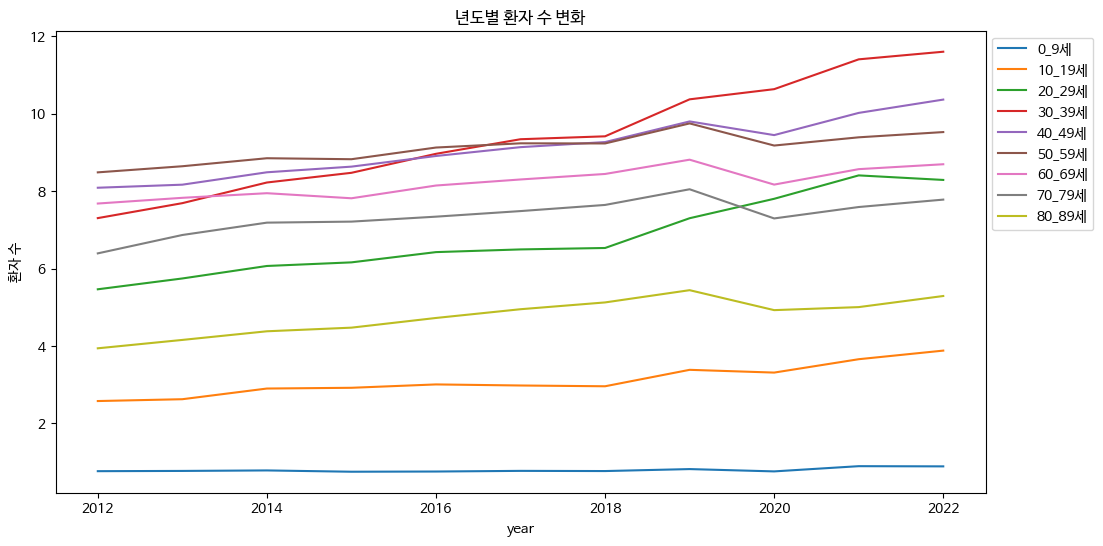

In [316]:
plt.figure(figsize=(12, 6)) 
plt.title('년도별 환자 수 변화')
plt.xlabel('year')
plt.ylabel('환자 수')
sns.lineplot(data=df_total_FHP, x = 'year', y='patient_ratio',hue='age',estimator = 'mean', ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<Axes: xlabel='year', ylabel='patient_ratio'>

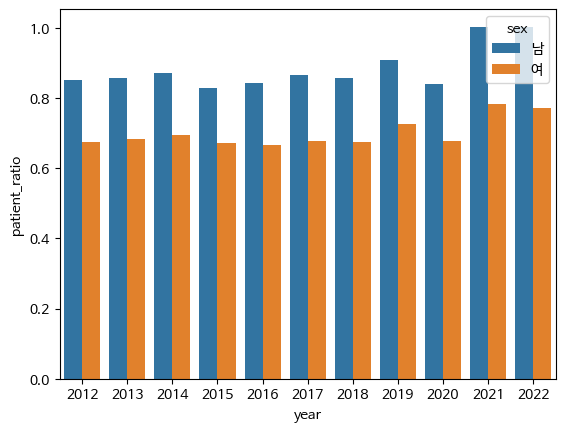

In [363]:
sns.barplot(data=df_sex_FHP.query("age=='0_9세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

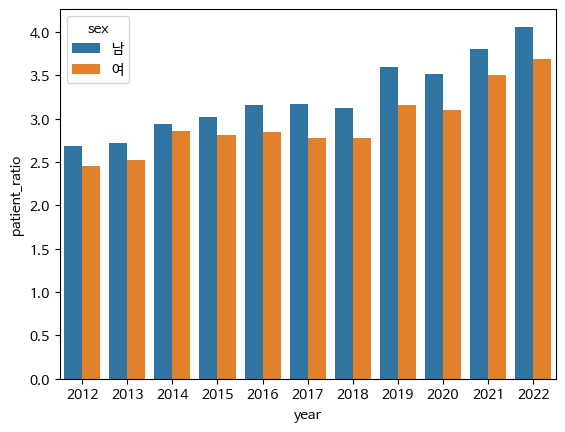

In [364]:
sns.barplot(data=df_sex_FHP.query("age=='10_19세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

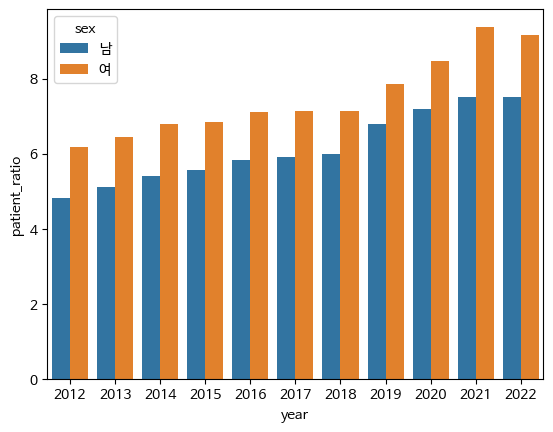

In [365]:
sns.barplot(data=df_sex_FHP.query("age=='20_29세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

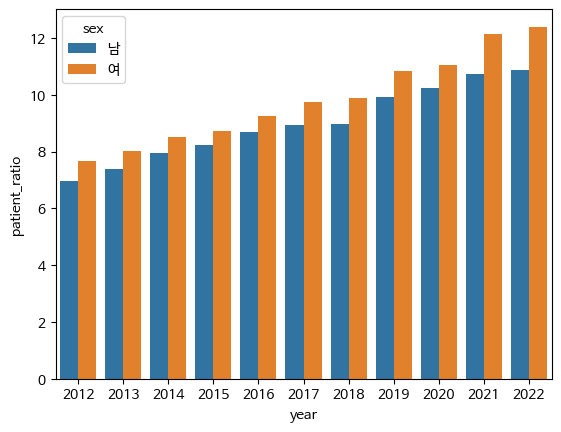

In [366]:
sns.barplot(data=df_sex_FHP.query("age=='30_39세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

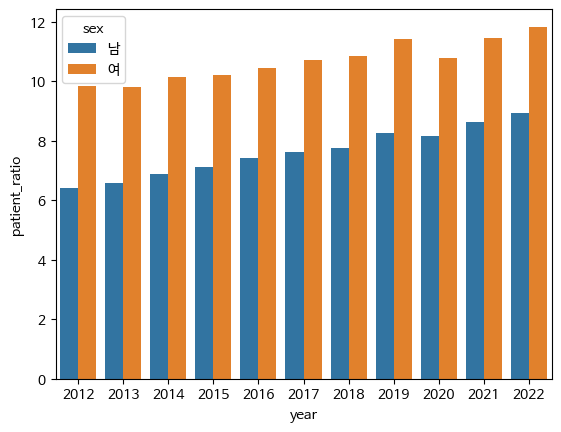

In [367]:
sns.barplot(data=df_sex_FHP.query("age=='40_49세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

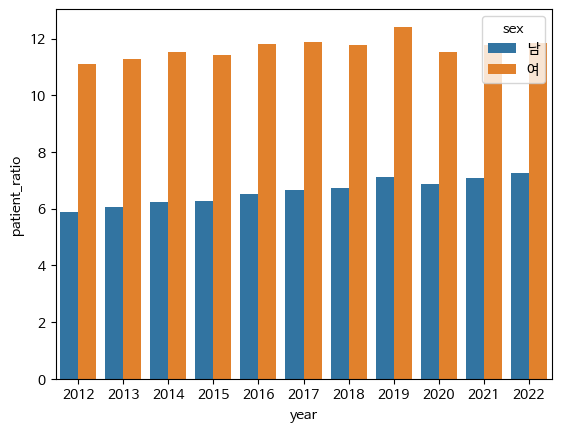

In [368]:
sns.barplot(data=df_sex_FHP.query("age=='50_59세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

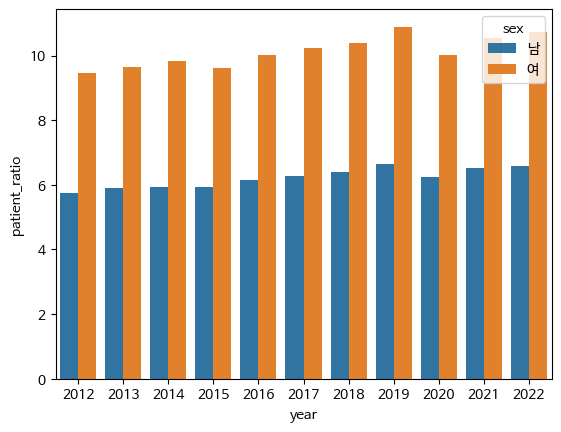

In [369]:
sns.barplot(data=df_sex_FHP.query("age=='60_69세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

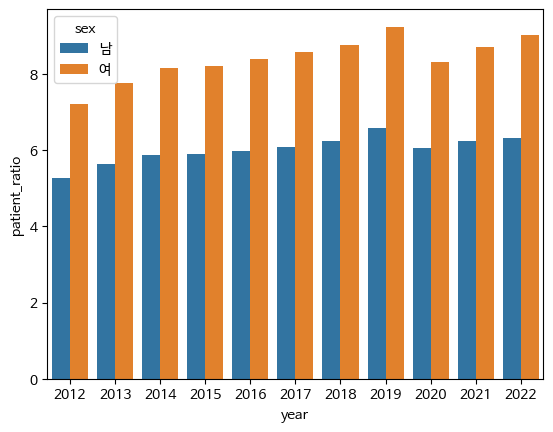

In [370]:
sns.barplot(data=df_sex_FHP.query("age=='70_79세'"),x='year',y='patient_ratio',hue='sex')

<Axes: xlabel='year', ylabel='patient_ratio'>

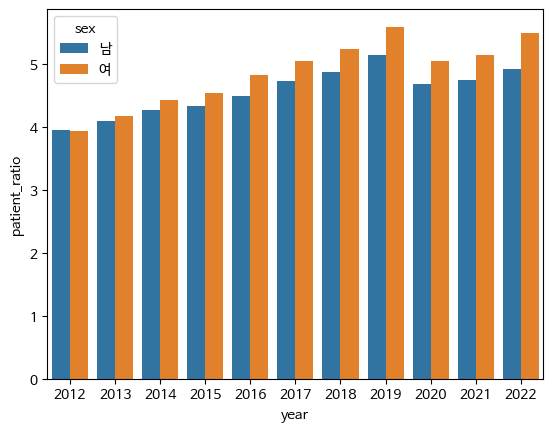

In [371]:
sns.barplot(data=df_sex_FHP.query("age=='80_89세'"),x='year',y='patient_ratio',hue='sex')

## 결과
- 전체 인구 대비 거북목을 앓고 있는 환자 비율이 점차 증가하고 있다.
- 특히, 30대의 경우 2012년에 비해 2022년에 4% 상승하여 다른 연령대에 비해 상승폭이 높음
- 10대까지는 남성의 거북목 차지 비율이 높았지만, 20대 이후부터는 여성이 더 높음

## 결론
- 거북목에 영향을 미치는 요인이 무엇인지 분석하여 연령대나 성별과 거북목의 상관관계를 좀 더 확인해볼 필요가 있다.